1. Реализовать функции активации из презентации (https://docs.google.com/presentation/d/1hmt_GIzgAo5Wfo6z2CP2Iu5nyaDEHoIsJF0UwysFM7s/edit?usp=sharing)
2. Изучить, как изменяется поведение однослойного перцептрона при изменении функции активации
3. Ответить на вопросы в конце ноутбука

## 0. импорты

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Callable

## 1. реализация функции активации

In [ ]:
def identity(x):
    """Тождественная функция"""
    return x


def unit_step(x):
    """Единичная ступенька"""
    return 1 if x >= 0 else 0


def sigmoid(x):
    """Логистическая функция (сигмоида)"""
    return 1 / (1 + math.exp(-x))


def tanh_activation(x):
    """Гиперболический тангенс"""
    return math.tanh(x)


def arctan_activation(x):
    """Арктангенс"""
    return math.atan(x)

In [17]:
def sigmoid_vec(x):
    return 1 / (1 + np.exp(-x))


def tanh_vec(x):
    return np.tanh(x)


def arctan_vec(x):
    return np.arctan(x)

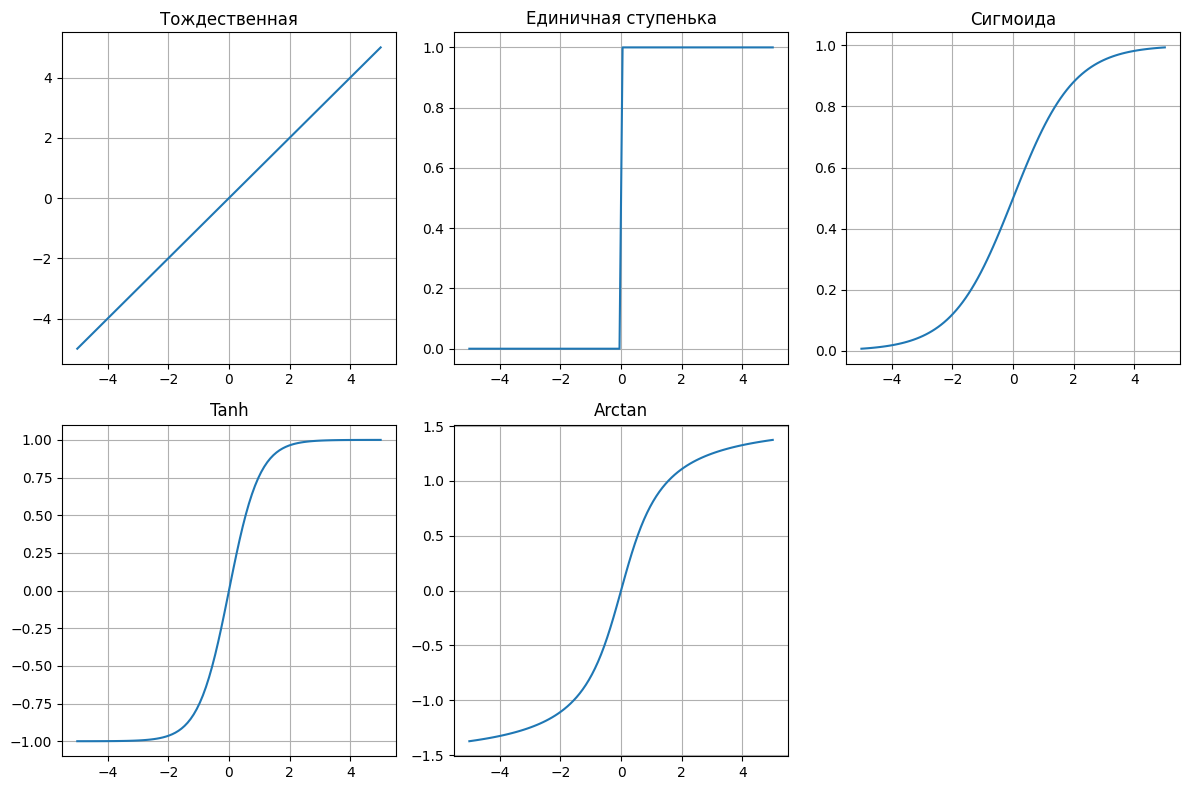

In [18]:
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, x)
plt.title('Тождественная')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, np.where(x >= 0, 1, 0))
plt.title('Единичная ступенька')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, sigmoid_vec(x))
plt.title('Сигмоида')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, tanh_vec(x))
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, arctan_vec(x))
plt.title('Arctan')
plt.grid(True)

plt.tight_layout()
plt.show()

## 2. поведение однослойного перцептрона при изменении функции активации

In [19]:
def perceptron(
    x: list[float],
    w: list[float],
    b: float,
    activation_func: Callable,
) -> float:
    """
    Args:
        x (list[float]): входные сигналы
        w (list[float]): весовые коэффициенты
        b (float): смещение (bias)
        activation_func: функция активации

    Returns:
        float: выход нейрона
    """
    weighted_sum = sum(x_i * w_i for x_i, w_i in zip(x, w)) + b

    return activation_func(weighted_sum)

In [20]:
x = [1.0, 0.5, -0.3]
w = [0.8, -0.2, 0.5]
b = -0.1

In [21]:
print("Unit step:", perceptron(x, w, b, unit_step))
print("Sigmoid:", perceptron(x, w, b, sigmoid))
print("Tanh:", perceptron(x, w, b, tanh_activation))
print("Arctan:", perceptron(x, w, b, arctan_activation))
print("Identity:", perceptron(x, w, b, identity))

Unit step: 1
Sigmoid: 0.610639233949222
Tanh: 0.42189900525000795
Arctan: 0.42285392613294076
Identity: 0.45000000000000007


## 3. ответы на вопросы

### 1. Что делает функция активации в искусственном нейроне?

Функция активации выполняет несколько ключевых функций:
- Вводит нелинейность - позволяет нейронной сети изучать сложные нелинейные зависимости
- Определяет выходной диапазон - ограничивает выходные значения (например, сигмоида дает [0,1], tanh дает [-1,1])
- Решает проблему "взрыва" градиентов - некоторые функции лучше подходят для обратного распространения ошибки
- Определяет поведение нейрона - пороговое (ступенька) или плавное (сигмоида)

### 2. Чем отличается искусственный нейрон от однослойного перцептрона?

- Искусственный нейрон - это базовый вычислительный элемент, который принимает входы, вычисляет взвешенную сумму и применяет функцию активации
- Однослойный перцептрон - это полная нейронная сеть, состоящая из одного слоя искусственных нейронов, способная решать задачи классификации

Ключевое отличие: перцептрон - это законченная архитектура, а искусственный нейрон - ее строительный блок.

### 3. Какое правило используется для обучения перцептрона?

Правило обучения перцептрона (правило Хебба):
```
w_i(new) = w_i(old) + η * (y_true - y_pred) * x_i
b(new) = b(old) + η * (y_true - y_pred)
```
где:
- η - скорость обучения
- y_true - правильный ответ
- y_pred - предсказание нейрона
- x_i - входное значение

### 4. Почему однослойный перцептрон не может решить задачу XOR?

XOR (исключающее ИЛИ) не является линейно разделимой функцией. Однослойный перцептрон может строить только линейные разделяющие поверхности (прямые линии в 2D, плоскости в 3D).

Для XOR невозможно провести одну прямую линию, которая разделит точки (0,0), (1,1) от (0,1), (1,0).

### 5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?

ReLU (Rectified Linear Unit) = f(x) = max(0, x)

Преимущества:
- Устраняет проблему затухающих градиентов (для положительных значений)
- Более эффективные вычисления
- Лучшая сходимость в глубоких сетях

Недостатки:
- "Умирающие нейроны" - при отрицательных входах градиент равен 0
- Не центрирована вокруг 0 (в отличие от tanh)

Влияние на перцептрон:
- Более быстрая обучение
- Возможность лучше изучать сложные зависимости
- Но может потребовать дополнительной настройки скорости обучения